# Constraint Programming and <br> Automatic Differentiation <br> for Automated Engineering Design
***
### Luke McCulloch, PhD

$$
\def\ptl{\partial}
\newcommand{\td}[1]{\text{d}#1}
\def\dt{\td{t}\,}
\def\dx{\td{x}\,}
\def\dy{\td{y}\,}
\def\dz{\td{z}\,}
\def\dA{\td{A}\,}
$$
$$
\newcommand{\lwl}{\text{L}_{\text{WL}}}
\newcommand{\lpp}{\text{L}_{\text{PP}}}
\newcommand{\loa}{\text{L}_{\text{OA}}}
\newcommand{\volDisp}{\nabla}
\newcommand{\beam}{\text{B}}
\newcommand{\draft}{\text{D}}
\newcommand{\draught}{\text{T}}
\newcommand{\cb}{\text{C}_{\text{B}}}
\newcommand{\cp}{\text{C}_{\text{P}}}
\newcommand{\cwp}{\text{C}_{\text{WP}}}
\newcommand{\cmdshp}{\text{C}_{\text{M}}}
\newcommand{\am}{\text{A}_{\text{M}}}
\newcommand{\awp}{\text{A}_{\text{WP}}}
\newcommand{\lcg}{\text{LCG}}
\newcommand{\lcb}{\text{LCB}}
$$

$$
\newcommand{\CWL}{\text{CWL}}
\newcommand{\lenFWL}{\text{LF}_{ \text{CWL} } }  
\newcommand{\CPK}{\text{CPK}}
\newcommand{\lenFCPK}{\text{LF}_{ \text{CPK} } }  
\newcommand{\FPD}{\text{Form Parameter Design} }
\newcommand{\fpd}{\text{form parameter design} }
\newcommand{\fpdi}{\text{FPD} }
\newcommand{\fpshd}{\text{form parameter ship hull design} }
\newcommand{\FPSHD}{\text{Form Parameter Shi Hull Design} }
\newcommand{\clp}{constraint logic programming}
\newcommand{\CLP}{Constraint Logic Programming}
\newcommand{\ai}{\text{ai}}
\newcommand{\AI}{\text{AI}}
\newcommand{\OR}{\text{OR}}
\newcommand{\vx}{\ul{v}_x}
\newcommand{\vy}{\ul{v}_y}
\newcommand{\ivx}{\ul{\textbf{v}}_x}
\newcommand{\ivy}{\ul{\textbf{v}}_y}
$$

$$
\newcommand{\ImportantNote}{\text{Note that}}
\newcommand{\FutureNote}{\text{In the future}}
$$

$$
\newcommand{\cbformula}{ \frac{\volDisp}{\lwl \times \beam 	\times \draft}}
\newcommand{\cpformula}{ \frac{\nabla}{\lwl \times \text{B} \times D \times \cmdshp} }
\newcommand{\cwpformula}{ \frac{\awp}{\lwl \times \beam} }
\newcommand{\cmdshpformula}{\frac{\am}{\text{B} \times \text{D}}}
$$

# Motivation

## Automation
  - Here I pick a problem to automate and tell you a little about it 
  
## Design
  - Constrained functional minimization (extrema finding) sets the stage for what's to come

# What's to come?

## Automatic Differentiation 
  - Programming without (as much) programming
  
## (interval) Constraint programming  
  - Design without (as much) _search_
  
## Results
  - If your going to solve a problem, eventually you have to... solve a problem.
  - Let's see some results

A picked problem:  automate the generation of this kind of thing:

![title](fig/RapidHull.png)

(NURBS early stage hullform (OSV type) in demo in Rhino, human created)

In [1]:
import warnings
warnings.filterwarnings('ignore') #sorry, I've got old code that needs updating -- shame on me!



This is called,

## Early Stage Ship Hull Design

Why would we want to work on this?

* One of a kind designs
* Less standardization than other industries
* No prototypes, less chance to iron out issues

![title](fig/DesignChallenges.png)

# Use Computation to Reduce Uncertainty

## In Ship Design Automation, 
## geometry generation has been a major bottleneck
* Physics solvers are "mature" (some more so than others)
* we are _getting_ _better_ at meshing (not great yet - also a bottleneck)
* we generate designs by the engineer-week ($$$)

## Form Parameter Design

* State of the art for early stage ship design
* Works by constrained optimization, minimizing some energy fuctional with constraints.

### It turns design into a series of functionals to be minimized.

## What kinds of properties do we care about?
$$ 
\begin{align*}
\nabla &: \text{Displacement} \\
L_{\text{WL}} &: \text{waterline length} \\
B &: \text{beam} \\
D &: \text{depth} \\
etc  ...
\end{align*}
$$
![title](fig/Rules/Cb.png)
### Basic sizing, dimensions, and ...

## Properties we care about:  differential / transitional
<img src="fig/HullProperties/DifferentialProperties.png" alt="Drawing" style="width: 600px;"/>

## Properties we care about: sectional areas
<img src="fig/midship_inplace.png" alt="Drawing" style="width: 500px;"/>


<img src="fig/HullProperties/MidshipCoeff.png" alt="Drawing" style="width: 500px;"/>

## Properties we care about:  sectional area
![title](fig/HullProperties/MidshipCoeff.png)

## What kinds of properties do we care about?

## Properties we care about:  volumetric / represented as area again!
<img src="fig/HullProperties/SAC.png" alt="Drawing" style="width: 600px;"/>

## What kinds of properties do we care about?

## Properties we care about: curvature
![title](fig/HullProperties/ManualDeformDerivativeIssue.png)

Some of you might be thinking, for our purposes we need to only change sizes of pieces of structure, no need to worry about differential properties, or similar, don't worry, we have something in here for you too.

## Control Properties with: Form Parameter Design
![title](fig/FPD/FPDsummary.png)

The complicated slide above tries to convey how constraints

are transformed into curves, 

which then inform a new layer of constraints, and subsequent curves

in this multilayer hierarchical process from coarse grained global description

to local description on the hull

It's curve solving and constraints all the way down

## How do we Make a B-spline curve which conforms to constraints?
![title](fig/FPD/cagd15curvedefBig.png)

Find a two dimensional open B-spline curve

\begin{equation}
\underline{q}(t)\;=\;\sum_{i=0}^{n}\underline{V}_{i}N_{i,k}(t) 
\label{eq:optproblem}
\end{equation}

such that a flexible set of selected form parameters, $\underline{h}$ 
is met and, in addition, the curve is considered "good" 
in terms of a problem-oriented measure, $f$.

$\underline{V}_{i}$ are the control vertices.  These are the free variables in our design.
<br>
$N_{i,k}$ are the basis functions
<br>
$\underline{q}\left(t\right)$ is the value of the curve at parameter $t$

Find a B-spline curve of given order $k$, number of vertices $n+1$, and specified knot 
vector $\underline{T}$ 

$\underline{V}_{i}$ are the control vertices
<br>
$N_{i,k}$ are the basis functions
<br>
$\underline{q}\left(t\right)$ is the value of the curve at parameter $t$

So, write down the problem:
	
$$
F = f + \sum_{j \in \left[ \forall h \right]}  \lambda_j h_j    
$$

$$
f = f\left(\underline{V}\right) \\
h_j = h_j\left(\underline{V}\right) \\
$$
$f$ is a fairness functional to be minimized
<br>
$h$ are constraints to be satisfied
<br>
$\lambda_j$ are Lagrange multipliers
	
Solve via Newton's method.  (We want geometry that minimizes $F$)
	
Solution: $\underline{\nabla} F = [0,0,0,0.... ]^T$
	
Basically find control vertices and Lagrange multipliers such that 
the gradient of $F$ is zero. (Then check your solution)	

In [2]:
import numpy as np #linear algebra
np.set_printoptions(precision=3)

In [3]:
import relational_lsplines as rsp #my stuff

In [4]:
spline = rsp.curve #Bspline curve and surface module


automatic_differentiation = rsp.automatic_differentiation #automatic_differentiation "module"
                    # simple fwd mode with vectors and intervals supported

adObjectMaker = automatic_differentiation.adObjectMaker

ad = automatic_differentiation.ad                   #automatic differentiation class

num_in_vec = 2  # problem space size, in this toy example

## What is Automatic Differentiation (AD)?
 * no finite differences
 * no symbolic derivatives
 * values exact to floating point

Derivatives by construction:

 * Overload mathmatical operations to return value, gradient, and hessian
 * where each computation includes the natural rules from calculus.

(Python Numpy makes it easy to extend to vectors and matrices)

I am not going to get into the weeds on forward mode vs reverse mode here

## How to setup AD

(assuming you have built a class for the overloading...)

For automatic differentiation on a design space, you need only a couple of matrices:

In [5]:
#Let's say my design space has only 2 variables for the moment

# for the gradient
identity = np.matrix(
                np.identity(2)) # [2x2] identity matrix 

# for the Hessian
nullmatrix = np.matrix(
                np.zeros((2,2),float)) # [2x2] null matrix

## How to setup AD

Instantiate an AD object:

In [6]:
x0 = ad(0.5, 
        grad  = identity[0], 
        hess  = nullmatrix)


### This use of the identity matrix to appoint gradients to free variables of the design space is reminecint of the adjacency matrix from meshing.

* and we all know that the connectivity of a mesh, as defined by it's adjacency matrices on vertices, edges, and faces, leads directly to the exterior derivative of said quantities.
* coincidence?  Heck no!



In [7]:

print 'x0.value = ',x0.value
print 'x0.grad  = ', x0.grad
print 'x0.hess  = '
print x0.hess

x0.value =  0.5
x0.grad  =  [[1. 0.]]
x0.hess  = 
[[0. 0.]
 [0. 0.]]


## How to setup AD

Here is the second variable.

In [8]:
x1 = ad(2.0, 
        grad  = identity[1], 
        hess  = nullmatrix)

print ''
print 'x1.value = ',x1.value
print 'x1.grad  = ', x1.grad
print 'x1.hess  = '
print x1.hess





x1.value =  2.0
x1.grad  =  [[0. 1.]]
x1.hess  = 
[[0. 0.]
 [0. 0.]]


Now we are ready to compute something

How about $f = x_0 + x_{1}^{2}$

In [9]:
f = x0 + x1**2

print '\ntest value' # 0.5 + 2**2 = 4 is...?
print f.value

print '\ntest gradient' # df/dx0 , df/dx1 is ..
print f.grad.T

print '\ntest hessian' #[ [df/dx0dx0 ,..., df/dx1dx1]] is ... 
print f.hess


test value
4.5

test gradient
[[1.]
 [4.]]

test hessian
[[0. 0.]
 [0. 2.]]


## B-spline Curves

In [10]:

def precompute_curve_integrals():

    curve1.basis_matrix()
    curve1.pts_M_pts() #arc length precomputation
    curve1.compute_arclength()
    curve1.MomentMatrices()
    curve1.fairness()
    curve1.compute_area()
    return


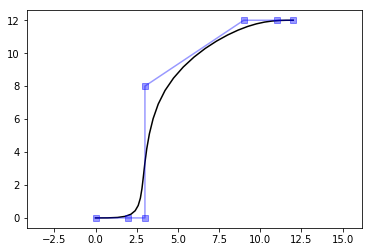

In [11]:
dimensions = 2   # 2D curve example
order      = 4   #degree + 1

#numpy array:
vertices   = np.asarray([[0.,0.],[2.,0.],[3.0,0.0],[3.0,8.0],
                         [9.0,12.],[11.,12.],[12.,12.]])

curve1 = spline.Bspline(vertices,order) #make Bspline curve
curve1.plotcurve_detailed() #plot it


## B-spline properties

A fairness functional objective:
	
\begin{equation}
E_N \;=\; \intop_{t_{B}}^{t_{E}}\left[
\left(\frac{\text{d}^{\text{N}}q_{x}}{\text{dt}^{\text{N}}}\right)^2
\,+\, \left(\frac{\text{d}^{\text{N}} q_y}{\text{dt}^{\text{N}}}\right)^2\,\right] \text{dt}
\qquad\text{with $N = 1,2,3$}
\end{equation}

$E_N$-norms which approximate things with physical analogies.  e.g.
the bending energy in the curve when $N=2$.

In [12]:
precompute_curve_integrals()
print 'The value of the second fairness functional, E2 is,'
print 'curve1.E2 =', curve1.E2

The value of the second fairness functional, E2 is,
curve1.E2 = 7210.666666666669


## Automatic Differentation of B-spline Curves
First make AD variables that match the curve vertices:

In [13]:
num_in_vec = len(vertices)
xpts = []
ypts = []
for i in range(num_in_vec):
    xpti = vertices[i,0]
    ypti = vertices[i,1]
    xpts.append( ad( xpti, N=num_in_vec*dimensions, 
                    of_scalars=True, dim=i) )
    ypts.append( ad( ypti, N=num_in_vec*dimensions, 
                    of_scalars=True, dim=i+num_in_vec) )

## How about Auto Diff'ing fairness functionals?


A fairness functional objective:
	
\begin{equation}
E_N \;=\; \intop_{t_{B}}^{t_{E}}\left[
\left(\frac{\text{d}^{\text{N}}q_{x}}{\text{dt}^{\text{N}}}\right)^2
\,+\, \left(\frac{\text{d}^{\text{N}} q_y}{\text{dt}^{\text{N}}}\right)^2\,\right] \text{dt}
\qquad\text{with $N = 1,2,3$}
\end{equation}

$E_N$-norms which approximate things with physical analogies.  e.g.
the bending energy in the curve when $N=2$.

These can be re-written to pre-compute the integrals.

\begin{equation}
E_N \;=\;  \;   
\underline{v}_x^T \cdot
\int_{t_B}^{t_E}  \underline{\underline{M}}_{N}(t) \text{dt}  \cdot \underline{v}_x
\,-\, 
\underline{v}_{y}^T  \cdot 
\int_{t_B}^{t_E} \underline{\underline{M}}_{N}^T(t) \text{dt}  \cdot  \underline{v}_{y}  
\end{equation}

The $\underline{\underline{M}}_{N}$ are matrices of
integrals of prodcts of basis functions and their derivatives which never change.


In [14]:

def fairness(curve, vertices=None):
    """
        Method to compute the non-weighted fairness 
        functionals of a B-spline curve.

    """        
    if vertices is None:
        xpts = curve.vertices[:,0]
        ypts = curve.vertices[:,1]
    else:
        xpts = vertices[0]
        ypts = vertices[1]
    E1 = np.dot(np.dot(xpts,curve.M1),xpts)+np.dot(np.dot(ypts,curve.M1),ypts)
    E2 = np.dot(np.dot(xpts,curve.M2),xpts)+np.dot(np.dot(ypts,curve.M2),ypts)
    E3 = np.dot(np.dot(xpts,curve.M3),xpts)+np.dot(np.dot(ypts,curve.M3),ypts)

    return E1,E2,E3

These can be re-written to pre-compute the integrals.

\begin{equation}
E_N \;=\;  \;   
\underline{v}_x^T \cdot
\int_{t_B}^{t_E}  \underline{\underline{M}}_{N}(t) \text{dt}  \cdot \underline{v}_x
\,-\, 
\underline{v}_{y}^T  \cdot 
\int_{t_B}^{t_E} \underline{\underline{M}}_{N}^T(t) \text{dt}  \cdot  \underline{v}_{y}  
\end{equation}

The $\underline{\underline{M}}_{N}$ are matrices of
integrals of prodcts of basis functions and their derivatives which never change.

Area integration goes the same way.
For that matter, so do moments of area.

In [15]:
#call our new function with AD xpts and ypts:
e1,e2,e3 = fairness(curve1, [xpts,ypts])

print "e2 value = {}".format(e2.value)
print ''
print 'e2 gradient Transposed = '
print e2.grad

e2 value = 7210.66666667

e2 gradient Transposed = 
[[-2496.     3456.     -352.    -1152.      544.      384.     -384.
   1024.     -640.    -1237.333   682.667   554.667   128.     -512.   ]]


## How About B-spline Curvature?

\begin{align}
c_B \;&=\; \left.\frac{\dot{q}_{x}\ddot{q}_{y}
    \,-\,\ddot{q}_{x}\dot{q}_{y}}{
    \sqrt{\dot{q}_{x}^{2}\,+\,\dot{q}_{y}^{2}}}
\right|_{(t=t_{B})} 
\end{align}

Well, you can't pre-compute it efficiently, but it's just products of B-spline derivatives.
<br>
AD has no trouble.  
<br> 
In general, we can compute tangents along the curve, arc length, centroids (using moments of area)... many quantities, all analytically.

# Let's Optimize this Curve

In [16]:
# get the library components:
ADILS = rsp.ADILS
Lagrangian, IntervalLagrangeSpline = ADILS.Lagrangian, ADILS.IntervalLagrangeSpline
FormParameter = rsp.FormParameter  
FormParameterDict, generalized_aattractor = FormParameter.FormParameterDict, FormParameter.generalized_aattractor

#yeah, this could be easier,
initialValues  =  rsp.initialValues     
InitializeControlPoints, InitializeControlVertices, \
                                  interval_bounds, lagrangian_bounds = initialValues.InitializeControlPoints, initialValues.InitializeControlVertices, \
                                  initialValues.interval_bounds, initialValues.lagrangian_bounds
                                  


In [17]:
# create a dictionary to hold components of our Functional F:
FPD = FormParameterDict(curve1) 

#fairness functional, f:
FPD.add_E2(kind='LS') # "LS" asks our library to minimize 


# now the equality constraints:
#
# C1 (tangent) clamp at the ends:
FPD.add_AngleConstraint(kind='equality', location = 0., value = 0.)
FPD.add_AngleConstraint(kind='equality', location = 1., value = 0.)
#
# C2 curvature clamp at the ends
FPD.add_CurvatureConstraint(kind='equality', location = 0., value = 0.)
FPD.add_CurvatureConstraint(kind='equality', location = 1., value = 0.)

#Setup done.


# Let's Optimize this Curve

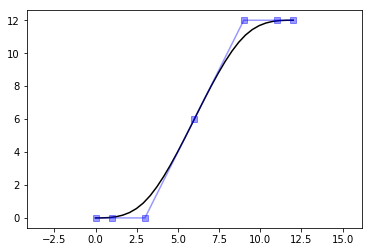

In [18]:
#setup and solve:
L = Lagrangian(FPD) #shake and bake a bit
Lspline = IntervalLagrangeSpline(curve1, L) #"interval" name is due to history
vertices = Lspline.optimize() #solve it

Lspline.curve.plotcurve_detailed()

## Form Parameter Design (FPD) Shortcomings

We optimized that curve.  Now we have the basics of FPD.

We used Automatic Differentation to make implementation easy

What's wrong with our automation now?

>Even if all of the initially given form requirements are met, there are sometimes flaws in the resulting shapes because the form parameters may not be appropriately attuned to start with. It takes _judgment_ and often some _iteration_ in order to _harmonize_ all requirements.

Computational Geometry for Ships, Nowaki, et al., 1995 

# How do we harmonize this?

<img src="fig/FPD/FPDsummary.png" alt="Drawing" style="width: 700px;"/>



# When our inputs look like this:


![title](fig/FPDinput.png)

## (Interval) Constraint Programming

> A designer knows he has achieved perfection not when there is nothing left to add, but when there is nothing left to take away. 

\-Antoine de Saint-Exupéry

How to determine what to take away?
### Use Natural Naval Archecture Design Relationships...

Block Coefficient
$$
\text{C}_{\text{B}} = \frac{\nabla}{\text{L}_{\text{WL}} \times \text{B} 	\times \text{D}}
$$
Midship Coefficient
$$
\text{C}_{\text{M}} = \frac{\text{A}_{\text{M}}}{\text{B} \times \text{D}}
$$
Prismatic Coefficient
$$
\text{C}_{\text{P}} = \frac{\nabla}{\text{L}_{\text{WL}} \times \text{B} \times D \times \text{C}_{\text{M}}}= \frac{\text{C}_{\text{B}}}{\text{C}_{\text{M}} }
$$

And many others.  In fact this framework you can invent your own.

## What do these rules look like?

![title](fig/Rules/Cb.png)

### Very similar to what we are already doing!

 * instead of controlling one number directly as a constraint,
 * we specify relationships between the design variables, 
 * and use constraint solving to eliminate infeasible choices

# Wait, what are we going to do...?

## Answer:  Setup a design space in a new way


### A design space consists of several form parameters:
$$
\begin{eqnarray*}
\nabla & : & \text{volumetric displacement} \\
\text{L}_{\text{WL}} & : & \text{length along the waterline} \\
\text{B} & : & \text{width at midship} \\
\text{D} & : & \text{distance from waterline to the keel} \\
\text{A}_{\text{M}} & : & \text{midship area} \\
\text{C}_{\text{B}} & : & \text{block coefficient} \\
\text{C}_{\text{M}}  & : & \text{midship coefficient} 
\end{eqnarray*}
$$
(in general on the order of 20-30 parameters and design ratios)


Find a form parameter, _interval_ valued, thin, 
    $\textit{ design space}$, $\text{S}$
    
\begin{equation}
S_{j}=[\underline{S_{j}},\overline{S_{j}}]
\end{equation}

such that all constraints and relations 
are feasible,  and the form  parameter design 
program  returns a valid hull  geometry.


## What am I talking about?


## 2 Philosophical Choices:


 * From single design to operating on the _entire_ design space at once
   * via _Interval arithmetic_  (that surely needs explaining)
   
   
 * How to solve this system of rules (interval equations)
   *  Matrix of linear equations?
   *  Local consistencies?  (constraint programming)
   
We choose local consistencies for the technical reason that matrix interval methods often need local consistencies anyway.

# Interval Arithmetic, briefly considered.

In [19]:
ia = rsp.ia                                         #interval analysis class

lp = rsp.lp # miniKanren - like relational logic, extended for intervals.

from relational_lsplines.simple_hull_rules_language import HullGeometryGenerator

# Interval Arithmetic, in one slide

$$
\left(1.,2.\right) +\left(0.,5.\right) = \left( 1., 7. \right)
$$
 * It's based on closed intervals of real numbers.
 * e.g. $\left(1.,2.\right)$ defines a continuum from $1.$ to $2.$ inclusive.
 * Operations composed of intervals and
     bound the range of corresponding real operations, rigorously, using outward rounding, on real computer hardware.

### Note: update of old data by new proceeds by taking the intersection.
This is absolutely essential interval constraint and interval optimization, programming.

In [20]:
a = ia(1.,2.)
b = ia(0.,5.)
c = ia(-1000.,1000.)
c = c & (a+b)
print 'c = ',c

c = ia(-2.,3.)
c = c & (a+b)
print 'c = ',c

c =  ia(1.0,7.0)
c =  ia(1.0,3.0)


How do we use an interval valued rule to eliminate infeasible designs?


	
# Interval Constraint programming.

## Forward Backward Constraint Propagation

Let's show how a forward backward algorithm works
using a simple mathematical expression:
$$
\left(x_{1} + x_{2}\right) \times x_{3} \in \left[1.,2.\right]
$$

## Build the syntax tree

![title](fig/syntax_tree.png)

## Forward Backward Contractor, Intermediate Terms:
![title](fig/Intermediate_terms.png)


## Forward Backward Contractor, Forward Pass:
![title](fig/fwd_pass.png)


## Forward Backward Contractor, Backward Pass:
![title](fig/bwd_pass.png)


## Update Rule:

## Update



## Of old data by new data




## Proceeds By Intersection

How do we make it work for arbitrary systems of rules?


## Unification


Is an algorithm for making two things equal.  (within an environment)

Data can flow in either direction across the equals sign.

In [21]:
fragment= \
"""
def unify(self, a, b):
    ivars = a,b # a and b are logical variables, now saved in ivars
    a = self.value_of(a) # get the value of a 
    b = self.value_of(b) # get the value of b
    #...
    if isinstance(a, ia) and isinstance(b, ia):
        values = copy.copy(self.values) # self.values maps vars to values
        # this is the "environment"
        values[ivars[0]] = a & b
        values[ivars[1]] = values[ivars[0]] & b
    #...
"""

Issue:  unification always acts on 2 terms.

## How do we make logical constraint relations work for any mathmatical statement?

## Answer:  Compile mathmatical expressions into syntax trees

Use operator overloading to build a tree of relational terms from a mathmatical expression.
 * Operator overloading handles parsing of n-ary 
    mathematical terms into ternary constraints.
 * The overloading class must Store 
   * the ternary elements of a computation
   * Also store the operation used to combine two of them into the other
 * Then we methodically convert those 
    ternary constraints into
    binary logical rules and perform unification on them.
 * We keep track of what terms are used in what rules.
    
Data can then flow freely between our terms and across rules

This is constraint logic programming.

## Let's look at an example design space and see what a rule looks like



In [22]:
"""Make some design space variables:
"""
lwl = lp.PStates(name='lwl')
bwl = lp.PStates(name='bwl')
draft = lp.PStates(name='draft')
vol = lp.PStates(name='vol')
disp = lp.PStates(name='disp')

Cb = lp.PStates(name='Cb')
Cp = lp.PStates(name='Cp')


## To make it a real interval desgin space, 


In [23]:

vol = vol == ia(50000.,100000.)
bwl = bwl == ia(25.,30.)

#etc

## Let's see what a rule syntax tree looks like



In [24]:
"""-----------------------------------------------
#rule: block coefficient
"""
Cb = Cb == vol/(lwl*bwl*draft)

print Cb

'Cb'==
   'v3'/
      'vol'==
         'ia(50000.0,100000.0)' 
        
      'v2'*
         'v1'*
            'lwl' 
        
            'bwl'==
               'ia(25.0,30.0)' 
        
         'draft' 
        



Python automatically creates temporaries so that all operators act to combine two terms into a third.

This let's us walk the tree in reverse to compile logical rules.

We keep track of what terms are used in what rules.

## Constraints are Compiled Into a Graph:


<img src="fig/PrimaryConstraintGraph.png" alt="Drawing" style="width: 700px;"/>

## So now, when one term updates information due to some rule.

### Call all the other rules that term is used in.

### Other terms update during the rule processing as well.

### So call their rules too!

### Thanks to update by intersection, termination will occur


With a section curve, one constraint is that the area of the section should fit in a box:

<img src="fig/midship_section.png" alt="Drawing" style="width: 400px;"/>


How do we get a single boat out of it?

## Select numbers at random, from the feasible domain

 * Iterate over the design space one variable at a time
 * Pick a number from the feasible domain at random
 * Use constraint propagation to update all the other design variables with the new data.
 <br>
 (This eliminates swaths of the design space each time)
 * Once a single design is determined, do form parameter design.

## Resultant hull constraint combinations were always feasible

<img src="fig/Cb_def.png" alt="Drawing" style="width: 700px;"/>


This made it easy to have form parameter design solve for a decent looking hull

## Resulting solved curve form parameters had little error

<img src="fig/results1.png" alt="Drawing" style="width: 700px;"/>



However, by the time the surface is generated, the fit is no longer prefect
(future work!)

## Details:  I used spatial splitting (and THB-splines) for fine grained form paremter design

<img src="fig/OSVMultiSurfColor.png" alt="Drawing" style="width: 700px;"/>

## Details:  Together with Auto Diff, this allowed much freedom to sculpt interfaces between surface

<img src="fig/FFCinfluence1.png" alt="Drawing" style="width: 700px;"/>

But I am not using form parameter design to it's fullest.


## I focused on making it easier to use.

# Thank you for your attention!

Any questions?